<a href="https://colab.research.google.com/github/deviabburi/Prathyusha/blob/main/PROJECT_2_(09_12_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT-2

In [16]:
import json
import csv
import pandas as pd
from google.colab import files

file_path = "/content/sample_data/dataset_1.json"

with open('/content/sample_data/dataset_1.json', 'r') as f:
    json_df = [json.loads(line) for line in f]

    if len(json_df) == 1:
        json_df = json_df[0]

df = pd.DataFrame(json_df)
df.to_csv('/content/sample_data/output.csv', index=False)

In [17]:
#TASK 01 - Identify and remove null or missing values.
import pandas as pd

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
print("-------------------------------------------------------")
print("Null Values: ",df.isnull()) #Check for null values.
print("-------------------------------------------------------")
print("Missing Values: ",df.isnull().any().any()) #Returns true if there are null values.
print("-------------------------------------------------------")
df.fillna(0, inplace=True)
print("-------------------------------------------------------")
print("After replacing null values:")
print(df)
print("-------------------------------------------------------")

-------------------------------------------------------
Null Values:           url  make_model  short_description  body_type  price    vat     km  \
0      False       False              False      False  False  False  False   
1      False       False              False      False  False  False  False   
2      False       False              False      False  False  False  False   
3      False       False              False      False  False   True  False   
4      False       False              False      False  False   True  False   
...      ...         ...                ...        ...    ...    ...    ...   
15914  False       False              False      False  False  False  False   
15915  False       False              False      False  False  False  False   
15916  False       False              False      False  False  False  False   
15917  False       False              False      False  False  False  False   
15918  False       False              False      False  False

In [43]:
#TASK 02 - Standardize numerical fields (e.g., price, km) for consistency.
import pandas as pd

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
numerical_columns = ['price', 'km']

#Check if the column contains string values
for column in numerical_columns:
    if column in df.columns:
        if df[column].dtype == 'object':
                df[column] = pd.to_numeric(df[column].str.replace(r'[^0-9.]', '', regex=True))

    #Calculate mean and standard deviation
    mean = df[column].mean()
    std = df[column].std()

    df[column] = (df[column] - mean) / std #Standardizing the price and km columns

df

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,...,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,-0.304609,VAT deductible,0.585840,01/2016,2 previous owners,NaN,...,"['\n', 'Sicherheit:', ' ', 'Deaktivierung für ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,-0.476552,Price negotiable,1.228011,03/2017,NaN,NaN,...,['\nLangstreckenfahrzeug daher die hohe Kilome...,['\n4 (Green)\n'],['\n7\n'],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,-0.457598,VAT deductible,1.320373,02/2016,1 previous owner,NaN,...,"['\n', 'Fahrzeug-Nummer: AM-95365', ' ', 'Ehem...",['\n4 (Green)\n'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,-0.476552,NaN,1.040610,08/2016,1 previous owner,NaN,...,"['\nAudi A1: ', '- 1e eigenaar ', '- Perfecte ...",NaN,['\n6\n'],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,-0.166513,NaN,-0.480019,05/2016,1 previous owner,NaN,...,"['\n', 'Technik & Sicherheit:', 'Xenon plus', ...",NaN,NaN,['\nGermany\n'],NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,2.969077,VAT deductible,NaN,-/-,NaN,NaN,...,['\nVettura visionabile nella sede in Via Roma...,NaN,['\n6\n'],NaN,NaN,NaN,NaN,NaN,NaN,NaN
15915,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Van,2.960276,VAT deductible,-0.648680,01/2019,1 previous owner,NaN,...,"['\nDach: Panorama-Glas-Schiebedach, Lackierun...",NaN,['\n7\n'],['\nGermany\n'],NaN,NaN,"[[], [], []]",\nin 5 days from ordering\n,NaN,NaN
15916,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200 EDC Initiale Paris Leder LED Navi...,Van,2.958923,VAT deductible,-0.913317,03/2019,1 previous owner,NaN,...,"['\n', 'Getriebe:', ' Automatik', 'Technik:', ...",NaN,['\n6\n'],['\nAustria\n'],NaN,NaN,NaN,\nin 120 days from ordering\n,NaN,NaN
15917,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",Van,2.935230,VAT deductible,-0.913451,06/2019,NaN,NaN,...,"['\nDEK:[2691331]', 'Renault Espace Blue dCi 2...",NaN,['\n6\n'],NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#TASK 03 - Convert string fields like registration into proper datetime objects.
import pandas as pd
from datetime import datetime

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
df['year'] = df['registration'].to_datetime(format='%Y-%m')
#df['registration'] = pd.to_datetime(df['registration'], format='%Y-%m')
#df['registration'] = df['registration'].dt.strftime('%Y-%m')
print(df['registration'])

In [37]:
#TASK 04 - Calculate mean, median, and standard deviation for price and km.
import pandas as pd

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
price_column = df['price']
df['km'] = pd.to_numeric(df['km'].str.replace(r'[^0-9.]', '', regex=True))
km_column = df["km"]

#MEAN, MEDIAN AND STANDARD DEVIATION FOR PRICE
price_mean = price_column.mean()
price_median = price_column.median()
price_std_dev = price_column.std()

print("Price Column")
print("Mean: ", price_mean)
print("Median: ", price_median)
print("Standard Deviation: ", price_std_dev)
print("\n")

#MEAN, MEDIAN AND STANDARD DEVIATION FOR PRICE
km_mean = km_column.mean()
km_median = km_column.median()
km_std_dev = km_column.std()

print("KM Column")
print("Mean: ", km_mean)
print("Median: ", km_median)
print("Standard Deviation: ", km_std_dev)

Price Column
Mean:  18019.896727181356
Median:  16900.0
Standard Deviation:  7386.169408894609


KM Column
Mean:  34130.127828130244
Median:  22740.0
Standard Deviation:  37352.977568363145


In [38]:
#TASK 05 - Count the frequency of each make_model.
import pandas as pd

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
print("-------------------------------------------------------")
print("Frequency of each make_model:")
print(df['make_model'].value_counts())
print("-------------------------------------------------------")

-------------------------------------------------------
Frequency of each make_model:
make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64
-------------------------------------------------------


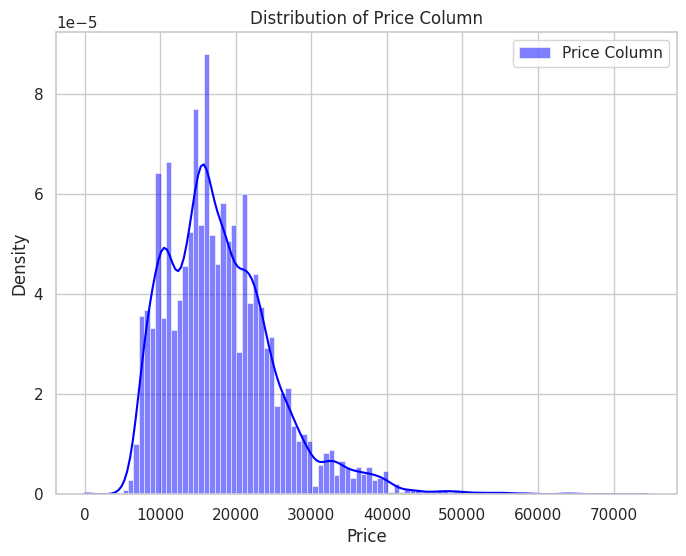

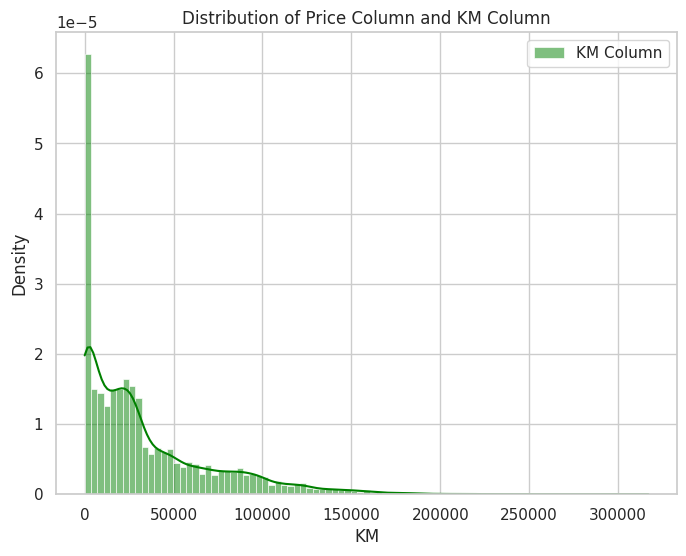

In [36]:
#TASK 06 - Plot the distribution of price and km.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
price_column = df['price']
df['km'] = pd.to_numeric(df['km'].str.replace(r'[^0-9.]', '', regex=True))
km_column = df["km"]

#HISTOGRAM PLOT GRAPH FOR PRICE
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(price_column, color='blue', kde=True, label='Price Column', stat='density')
plt.title('Distribution of Price Column')
plt.xlabel('Price')
plt.legend()
plt.show()

#HISTOGRAM PLOT GRAPH FOR KM
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(km_column, color='green', kde=True, label='KM Column', stat='density')
plt.title('Distribution of Price Column and KM Column')
plt.xlabel('KM')
plt.legend()
plt.show()

In [35]:
#TASK 07 - Analyze the average price by body_type.
import pandas as pd

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
average_price_by_body_type = df.groupby('body_type')['price'].mean()
print("Average Price by Body Type:")
print(average_price_by_body_type)

Average Price by Body Type:
body_type
Compact          15216.240089
Convertible      27905.375000
Coupe            14222.720000
Off-Road         17126.160714
Other            14209.796552
Sedans           17735.904846
Station wagon    18643.281171
Transporter      16764.795455
Van              30846.632184
Name: price, dtype: float64


Correlation between Price column and Km column:  -0.3878211904400773


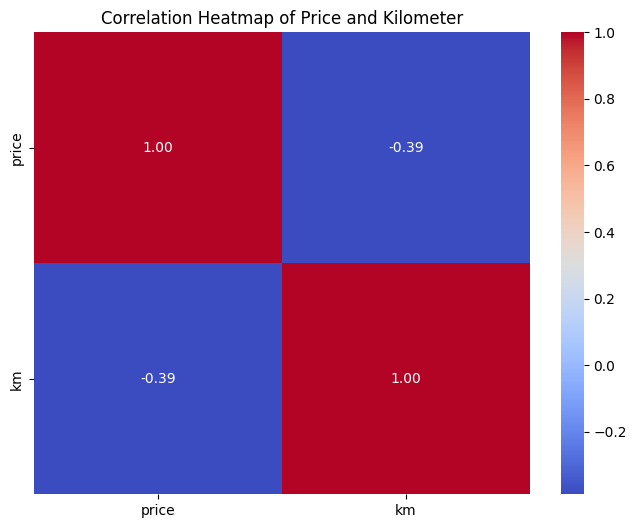

In [34]:
#TASK 08 - Identify correlations between numerical variables, such as price and km.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
df['km'] = pd.to_numeric(df['km'].str.replace(r'[^0-9.]', '', regex=True))

#Correlation Value
correlation_value = df['price'].corr(df['km'])
print("Correlation between Price column and Km column: ", correlation_value)

#CORRELATION HEATMAP OF PRICE AND KILOMETER
plt.figure(figsize=(8,6))
sns.heatmap(df[['price', 'km']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Price and Kilometer')
plt.show()

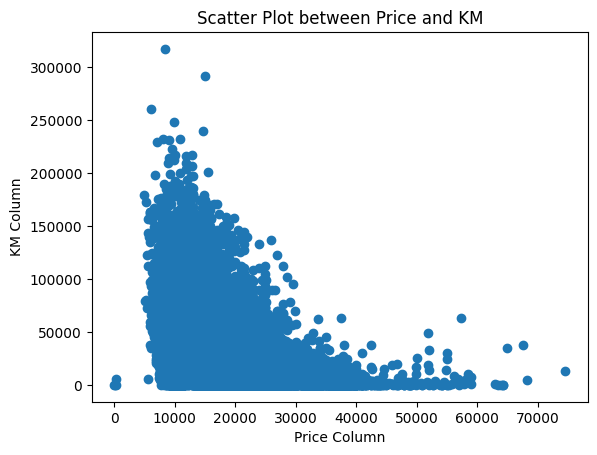

In [33]:
#TASK 09 - Create a scatter plot to show the relationship between price and km.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
df['km'] = pd.to_numeric(df['km'].str.replace(r'[^0-9.]', '', regex=True))

#SCATTER PLOT GRAPH
plt.scatter(df['price'], df['km'])
plt.xlabel('Price Column')
plt.ylabel('KM Column')
plt.title('Scatter Plot between Price and KM')
plt.show()

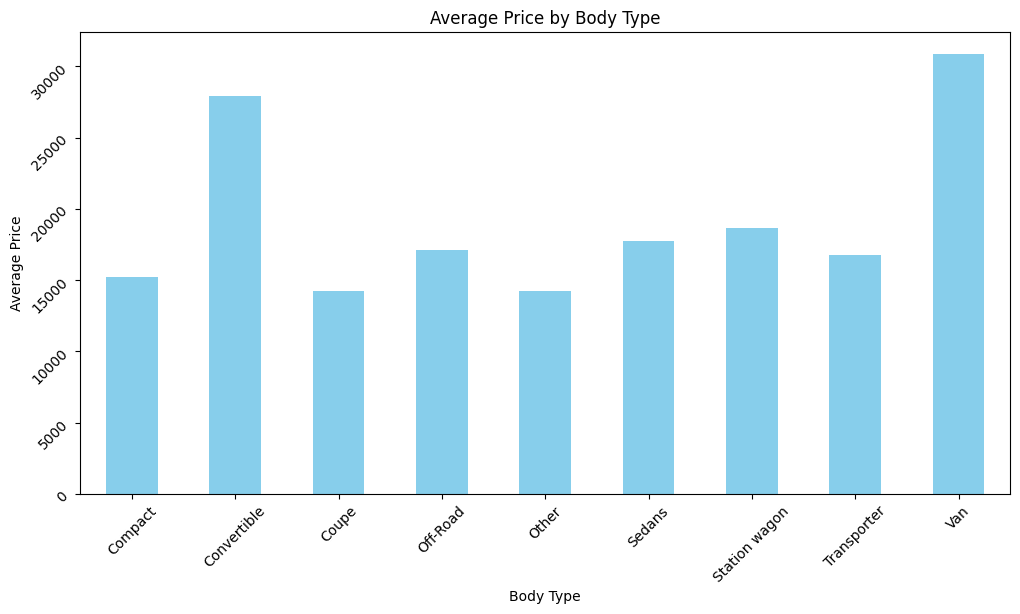

In [32]:
#TASK 10 - Use a bar chart to compare the average price of different body_type.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
average_price = df.groupby('body_type')['price'].mean()

#BAR GRAPH FOR AVERAGE PRICE BY BODY TYPE
plt.figure(figsize=(12, 6))
plt.title('Average Price by Body Type')
average_price.plot(kind='bar', color='skyblue')
plt.xlabel('Body Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


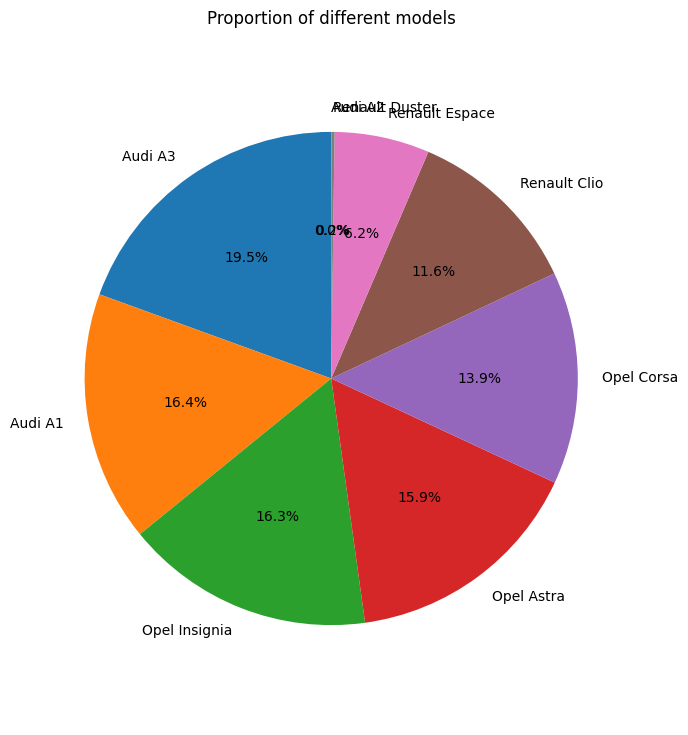

In [31]:
#TASK 11 - Display a pie chart for the proportion of different make_model.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
models = df['make_model'].value_counts()

#PIE CHART
plt.figure(figsize=(7, 9))
plt.pie(models, labels=models.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of different models')
plt.show()

In [30]:
#TASK 12 - Create a new column for the age of the car using the registration field.
import pandas as pd
from datetime import datetime

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
df['year'] = df['registration'].str.extract(r'(\d{4})')
df['year'] = pd.to_numeric(df['year'])
current_year = datetime.now().year
df['age_of_car'] = current_year - df['year']

print(df['age_of_car'])

0        8.0
1        7.0
2        8.0
3        8.0
4        8.0
        ... 
15914    NaN
15915    5.0
15916    5.0
15917    5.0
15918    5.0
Name: age_of_car, Length: 15919, dtype: float64


In [29]:
#TASK 13 - Generate a price_per_km column to assess cost efficiency.
import pandas as pd

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
df['km'] = pd.to_numeric(df['km'].str.replace(r'[^0-9.]', '', regex=True))
df['price_per_km'] = df['price']/df['km']

print(df['price'], df['km'], df['price_per_km'])

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15914    39950
15915    39885
15916    39875
15917    39700
15918    40999
Name: price, Length: 15919, dtype: int64 0        56013.0
1        80000.0
2        83450.0
3        73000.0
4        16200.0
          ...   
15914        NaN
15915     9900.0
15916       15.0
15917       10.0
15918        NaN
Name: km, Length: 15919, dtype: float64 0           0.281542
1           0.181250
2           0.175434
3           0.198630
4           1.036420
            ...     
15914            NaN
15915       4.028788
15916    2658.333333
15917    3970.000000
15918            NaN
Name: price_per_km, Length: 15919, dtype: float64


In [28]:
#TASK 14 - Create categories for cars based on price (e.g., low, mid, high).
import pandas as pd

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
low_prices = df['price'].quantile(0.33)  # 33rd percentile
high_prices = df['price'].quantile(0.66)
df['price_category'] = pd.cut(df['price'], bins=[-float('inf'), low_prices, high_prices, float('inf')], labels=['low', 'mid', 'high'])
print(df['price'], df['price_category'])

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15914    39950
15915    39885
15916    39875
15917    39700
15918    40999
Name: price, Length: 15919, dtype: int64 0         mid
1         mid
2         mid
3         mid
4         mid
         ... 
15914    high
15915    high
15916    high
15917    high
15918    high
Name: price_category, Length: 15919, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']


In [27]:
#TASK 15 - Identify vehicles with specific features such as “VAT deductible”.
import pandas as pd

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
deductible = df[df['vat'] == 'VAT deductible']
print(deductible)

                                                     url      make_model  \
0      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
2      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
6      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
7      https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
10     https://www.autoscout24.com//offers/audi-a1-sp...         Audi A1   
...                                                  ...             ...   
15914  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15915  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15916  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15917  https://www.autoscout24.com//offers/renault-es...  Renault Espace   
15918  https://www.autoscout24.com//offers/renault-es...  Renault Espace   

                                       short_description      body_type  \
0           

In [26]:
#TASK 16 - Identify the most common car models in the dataset.
import pandas as pd

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
common_models = df['make_model'].value_counts().head(10)
print(common_models)

make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64


In [25]:
#TASK 17 - Highlight the cars that provide the best value for money (low price_per_km).
import pandas as pd

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
df['km'] = pd.to_numeric(df['km'].str.replace(r'[^0-9.]', '', regex=True))
df['price_per_km'] = df['price']/df['km']
df = df.sort_values(by='price_per_km', ascending=True)
print(df['price_per_km'].head(10))

5712     0.023077
9279     0.026341
8827     0.027573
6399     0.030458
8824     0.030632
6401     0.033788
6380     0.034458
8822     0.034968
13757    0.036086
13761    0.036086
Name: price_per_km, dtype: float64


In [24]:
#TASK 18 - Find the average price and mileage for VAT-deductible vehicles.
import pandas as pd

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
df['km'] = pd.to_numeric(df['km'].str.replace(r'[^0-9.]', '', regex=True))
deductible_vehicles = df[df['vat'] == 'VAT deductible']
average_price = deductible_vehicles['price'].mean()
mileage = deductible_vehicles['km'].mean()
print("Average Price: ", average_price)
print("Mileage: ", mileage)

Average Price:  18708.520127504555
Mileage:  31506.39280109847


In [23]:
#TASK 19 - Group the vehicles based on attributes like price, km, and age.
import pandas as pd
from datetime import datetime

df = pd.read_csv('/content/sample_data/output.csv') #Read the data from CSV file
df['km'] = pd.to_numeric(df['km'].str.replace(r'[^0-9.]', '', regex=True))

#Car Age
df['year'] = df['registration'].str.extract(r'(\d{4})')
df['year'] = pd.to_numeric(df['year'])
current_year = datetime.now().year
df['age_of_car'] = current_year - df['year']

price_categories = [0, 10000, 20000, 30000, float('inf')]
km_categories = [0, 50000, 100000, 150000, float('inf')]
age_categories = [0, 2, 5, 10, float('inf')]

# Create labels for the bins
price_label = ['Low', 'Medium', 'High', 'Very High']
km_label = ['Low', 'Medium', 'High', 'Very High']
age_label = ['New', 'Young', 'Medium', 'Old']

# Create the categorical columns
df['price_group'] = pd.cut(df['price'], bins=price_categories, labels=price_label, right=False)
df['km_group'] = pd.cut(df['km'], bins=km_categories, labels=km_label, right=False)
df['age_group'] = pd.cut(df['age_of_car'], bins=age_categories, labels=age_label, right=False)

# Group the vehicles based on these attributes
vehicles = df.groupby(['price_group', 'km_group', 'age_group'])

group_counts = vehicles.size()
print(group_counts)
average_price_by_group = vehicles['price'].mean()
print(average_price_by_group)

price_group  km_group   age_group
Low          Low        New             0
                        Young           0
                        Medium       1149
                        Old             0
             Medium     New             0
                                     ... 
Very High    High       Old             0
             Very High  New             0
                        Young           0
                        Medium          0
                        Old             0
Length: 64, dtype: int64
price_group  km_group   age_group
Low          Low        New                  NaN
                        Young                NaN
                        Medium       8956.263708
                        Old                  NaN
             Medium     New                  NaN
                                        ...     
Very High    High       Old                  NaN
             Very High  New                  NaN
                        Young                NaN
    

<ipython-input-23-d50176e498a6>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicles = df.groupby(['price_group', 'km_group', 'age_group'])
